In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn đến thư mục gốc
dataset_dir = "/content/drive/MyDrive/Court_Keypoint/images"
img_dir = os.path.join(dataset_dir, "train/images")
label_dir = os.path.join(dataset_dir, "keypoint")

# Tạo thư mục train và val
train_img_dir = os.path.join(dataset_dir, "train1", "images")
train_label_dir = os.path.join(dataset_dir, "train1", "labels")
val_img_dir = os.path.join(dataset_dir, "val1", "images")
val_label_dir = os.path.join(dataset_dir, "val1", "labels")

os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Lấy danh sách file ảnh
img_files = [f for f in os.listdir(img_dir) if f.endswith(".png")]
img_files.sort()  # Đảm bảo thứ tự nhất quán

# Chia train/val
train_imgs, val_imgs = train_test_split(img_files, test_size=0.2, random_state=42)

# Di chuyển file ảnh và nhãn
for img in train_imgs:
    shutil.move(os.path.join(img_dir, img), os.path.join(train_img_dir, img))
    label = img.replace(".png", ".txt")
    if os.path.exists(os.path.join(label_dir, label)):
        shutil.move(os.path.join(label_dir, label), os.path.join(train_label_dir, label))

for img in val_imgs:
    shutil.move(os.path.join(img_dir, img), os.path.join(val_img_dir, img))
    label = img.replace(".png", ".txt")
    if os.path.exists(os.path.join(label_dir, label)):
        shutil.move(os.path.join(label_dir, label), os.path.join(val_label_dir, label))

print("Chia dataset thành công!")

KeyboardInterrupt: 

In [ ]:
!yolo pose train data=/content/drive/MyDrive/Court_Keypoint/images/data.yaml model=yolov8n-pose.pt epochs=100 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.52M/6.52M [00:00<00:00, 410MB/s]
Ultralytics 8.3.136 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Court_Keypoint/images/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



0: 384x640 1 badminton, 361.2ms
Speed: 19.1ms preprocess, 361.2ms inference, 31.2ms postprocess per image at shape (1, 3, 384, 640)


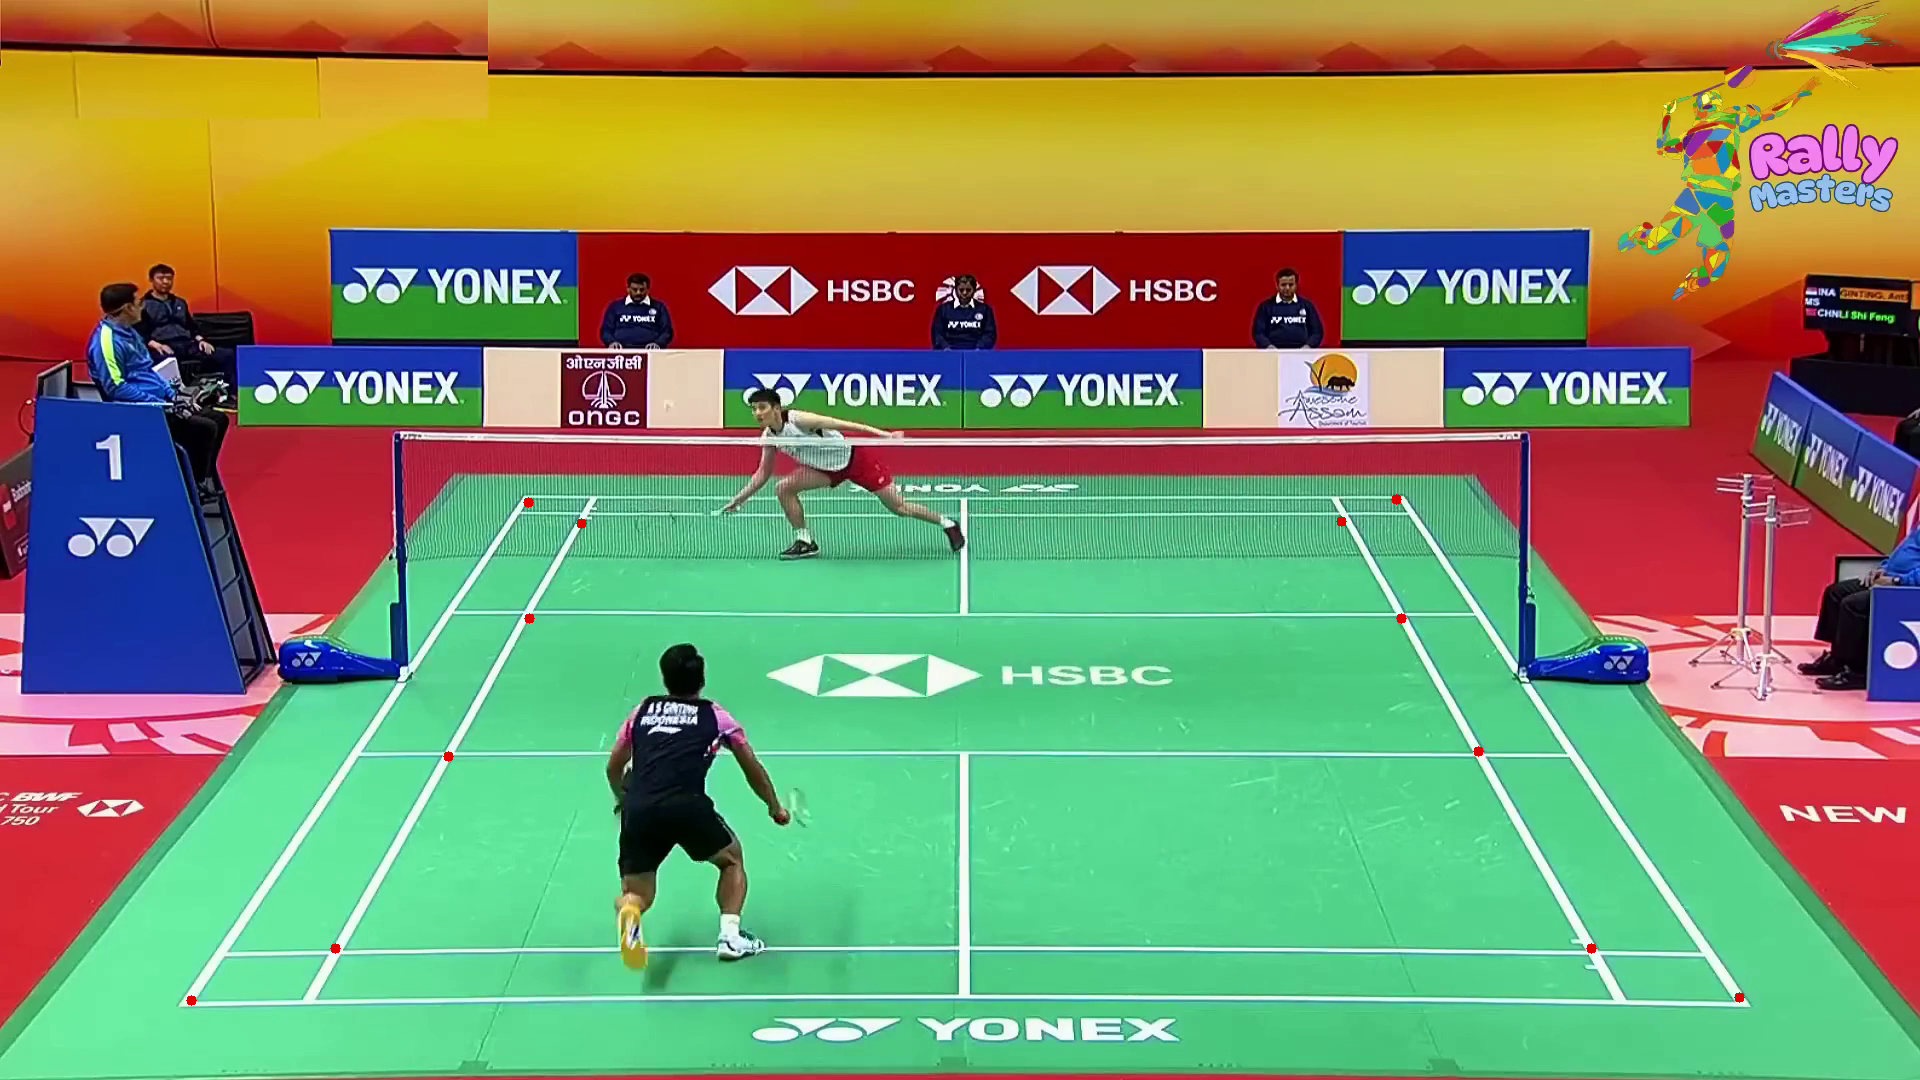

In [ ]:
model = YOLO("best_keypoint_v3.pt")

img_path = "/content/drive/MyDrive/Court_Keypoint/images/train/images/frame_000016.png"
img = cv2.imread(img_path)

# Inference
results = model(img)
keypoints_list = results[0].keypoints.xy

for keypoints in keypoints_list:
    for x, y in keypoints:
        x, y = int(x), int(y)
        cv2.circle(img, (x, y), radius=5, color=(0, 0, 225), thickness=-1)

cv2_imshow(img)